In [ ]:
'''This is just a shell, need to configure more sophisticated nn'''
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import torch.nn as nn
import torch
device = "cpu"

i = rd.randint(0, 9999)
data = np.load('sim_data.npy')
print(data.shape)
print(i)

(10000, 2, 32, 1024)
9992


In [233]:
num_epochs = 10
batch_size = 32
learning_rate = 1e-3
num_examples = 10000

In [234]:
X, Y = data[:, 0], data[:, 1]
X_train, Y_train, X_test, Y_test = X[:8000], Y[:8000], X[8000:], Y[8000:]

In [235]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.stack = nn.Sequential(
            nn.Linear(32*1024, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 32*1024),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.stack(x)
        return logits.reshape(-1, 32, 1024)

model = Net()

loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [236]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for i in range(0, 100, batch_size):
        batch_X = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32).to(device)
        batch_Y = torch.tensor(Y_train[i:i+batch_size], dtype=torch.float32).to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        l = loss(outputs, batch_Y)
        l.backward()
        optimizer.step()

        total_loss += l.item() 
    print(f"Epoch {epoch+1}, Loss: {total_loss / (len(X) // batch_size)}")

Epoch 1, Loss: 0.01319841811290154
Epoch 2, Loss: 0.011928159456986647
Epoch 3, Loss: 0.012149443611120567
Epoch 4, Loss: 0.011624047198356727
Epoch 5, Loss: 0.010809395557794815
Epoch 6, Loss: 0.010412252293183254
Epoch 7, Loss: 0.009833743365911337
Epoch 8, Loss: 0.009425334250315642
Epoch 9, Loss: 0.008863698786649948
Epoch 10, Loss: 0.007929056309736691


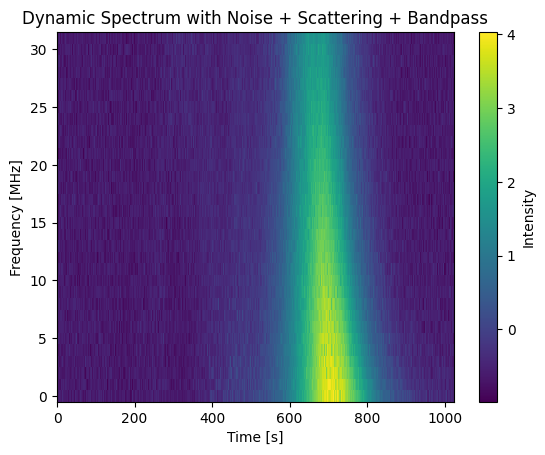

In [238]:
example = model(torch.tensor(X[0:1], dtype=torch.float32).to(device)).detach().numpy()

plt.imshow(example[0], aspect='auto', interpolation='nearest', origin='lower')
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Intensity")
plt.title("Dynamic Spectrum with Noise + Scattering + Bandpass")
plt.show()